# Descobrindo doadores em potencial 

- A partir de um dataset iremos itentificar possíveis doadores de fundos para eleições.
- No dataset temos dados sobre educação, trabalho, renda, etinia. 
- Nós sabemos que indivíduos que tem alta renda são melhores alvos para arrecadação de doações políticas.

### Vamos construir um classificador que prevê os níveis de renda, baseado em atributos pessoais

Os indivíduos com maior renda serão os primeiros a serem abordados em busca de doação política.

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/adult.data"
census = pd.read_csv(file_name)
census.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [99]:
census.shape

(32560, 14)

Como esse dataset não apresenta cabeçalho, precisamos primeiramente crialo

In [6]:
columns_ = ['age', 'workclass', 'fnlwgt','education','education-num','marital-status','occupation',
                'relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country', 'Income']   

In [9]:
census = pd.DataFrame(census.values,columns=columns_)
census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


Algumas informações sobre o dataset 

In [16]:
print("Linhas    :",census.shape[0])
print("colunas   :",census.shape[1])
print("\nParâmetros: \n", census.columns.tolist())
print("\nValores ausentes: \n", census.isnull().sum().values.sum())
print("\nValores únicos: \n", census.nunique())

Linhas    : 32560
colunas   : 15

Parâmetros: 
 ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'Income']

Valores ausentes: 
 0

Valores únicos: 
 age                  73
workclass             9
fnlwgt            21647
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
Income                2
dtype: int64


In [17]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
age               32560 non-null object
workclass         32560 non-null object
fnlwgt            32560 non-null object
education         32560 non-null object
education-num     32560 non-null object
marital-status    32560 non-null object
occupation        32560 non-null object
relationship      32560 non-null object
race              32560 non-null object
sex               32560 non-null object
capital-gain      32560 non-null object
capital-loss      32560 non-null object
hours-per-week    32560 non-null object
native-country    32560 non-null object
Income            32560 non-null object
dtypes: object(15)
memory usage: 3.7+ MB


Nas informações apresentadas acima, podemos observar que até os dados numéricos estão tipados em forma de objeto. Por isso iremos utilizar uma função da biblioteca Pandas para transforma-los em inteiros.

In [18]:
census = census.infer_objects()
census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [19]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
age               32560 non-null int64
workclass         32560 non-null object
fnlwgt            32560 non-null int64
education         32560 non-null object
education-num     32560 non-null int64
marital-status    32560 non-null object
occupation        32560 non-null object
relationship      32560 non-null object
race              32560 non-null object
sex               32560 non-null object
capital-gain      32560 non-null int64
capital-loss      32560 non-null int64
hours-per-week    32560 non-null int64
native-country    32560 non-null object
Income            32560 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Análise Exploratória dos Dados

In [23]:
census.Income.unique()

array([' <=50K', ' >50K'], dtype=object)

Removendo espaços ' '

In [26]:
census['Income'] = census['Income'].str.strip()

Informações sobre a renda.

In [27]:
# Número de registros
n_records = census.shape[0]

# Número de registros onde a renda do indivíduo é maior que $50,000
n_greater_50k = census.loc[census['Income'] == '>50K'].shape[0]

# Número de registros onde a renda do indivíduo é no máximo $50,000
n_at_most_50k = census[census['Income'] == '<=50K'].shape[0]

# Porcentagem dos indivíduos onde a renda é maior que $50,000
greater_percent = (n_greater_50k / n_records) * 100

# Resultados
print("Número Total de registros: {}".format(n_records))
print("Indivíduos de renda maior $50,000: {}".format(n_greater_50k))
print("Indivíduos de renda até no máximo $50,000: {}".format(n_at_most_50k))
print("Porcentagem dos indivíduos de renda maior que $50,000: {:.2f}%".format(greater_percent))

Número Total de registros: 32560
Indivíduos de renda maior $50,000: 7841
Indivíduos de renda até no máximo $50,000: 24719
Porcentagem dos indivíduos de renda maior que $50,000: 24.08%


Visualizações

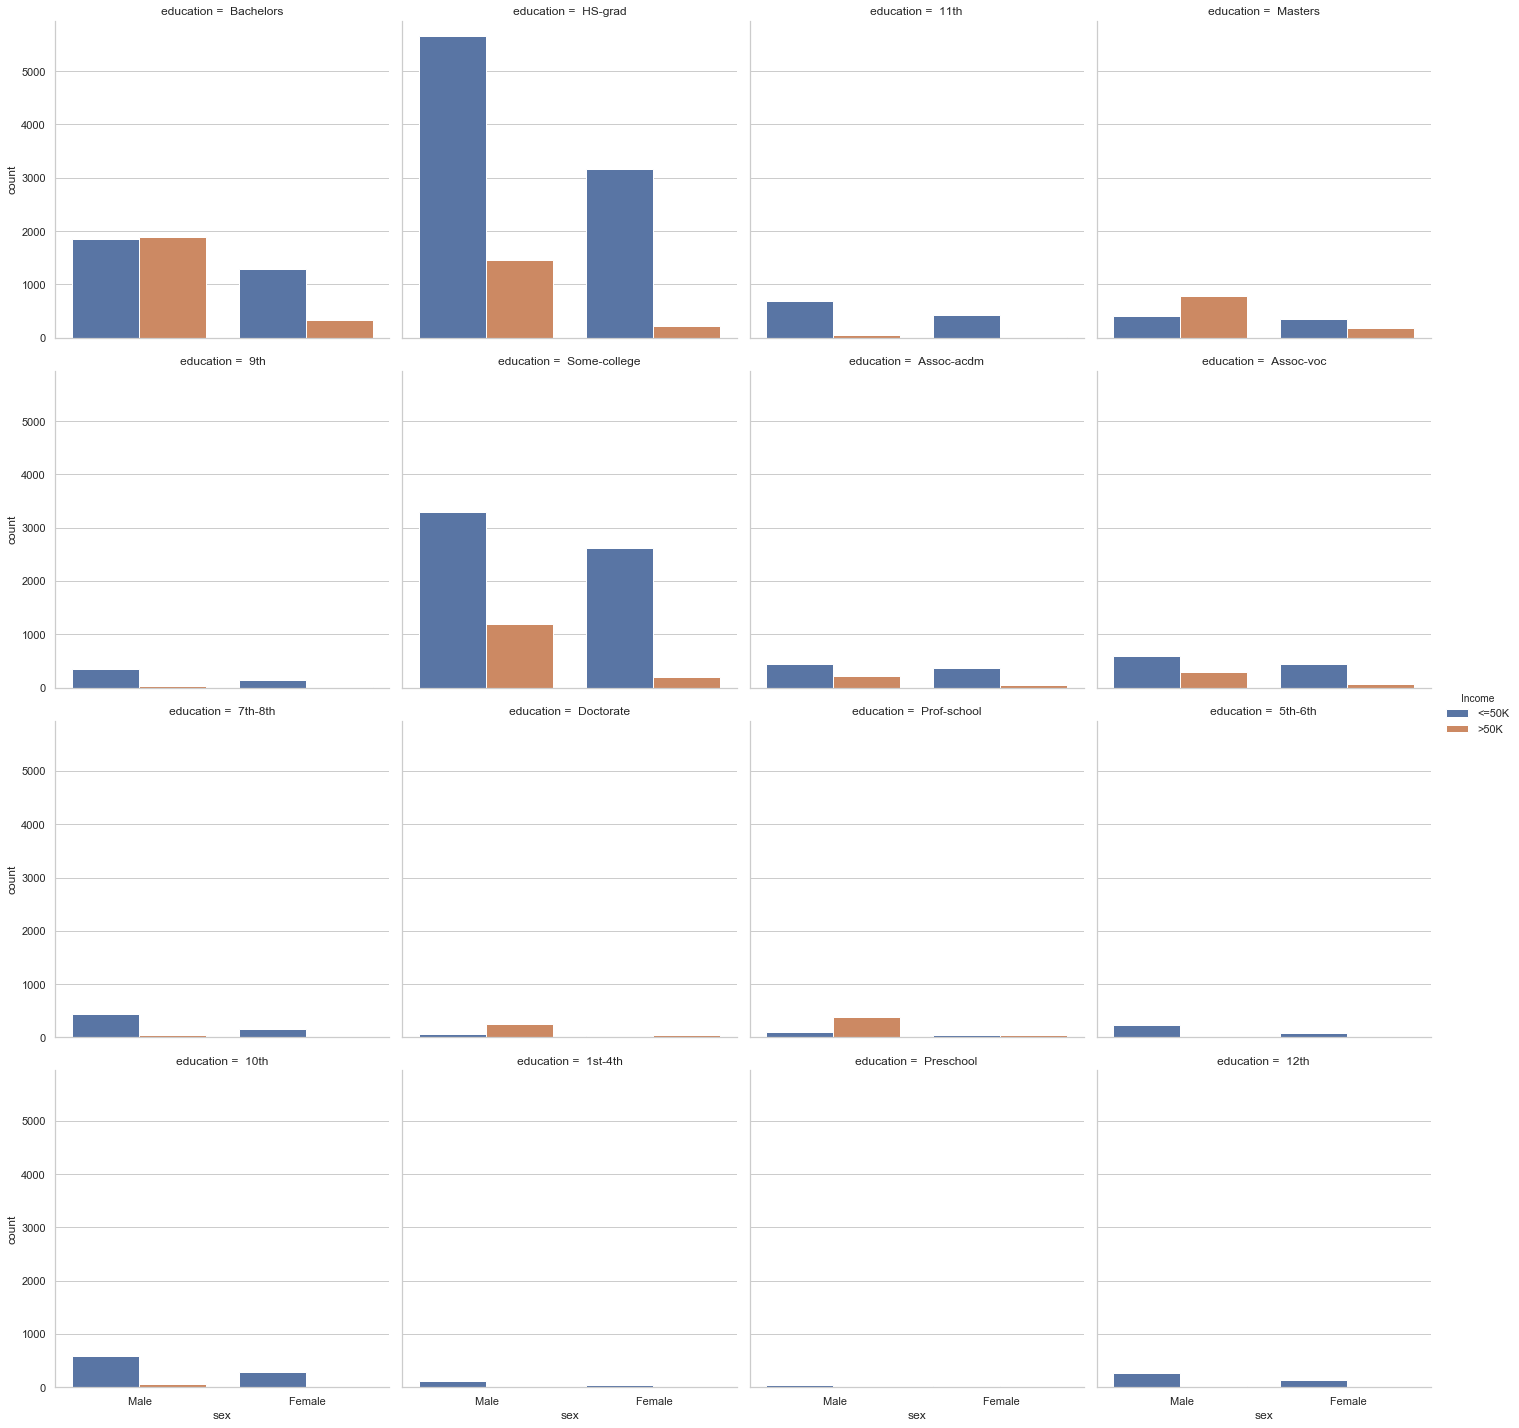

In [30]:
sns.set(style="whitegrid", color_codes=True)
sns.catplot("sex", col='education', data=census, hue='Income', kind="count", col_wrap=4);

<i> Nos gráficos acima são mostradas as relações entre o nível de educação, renda e sexo.
 
 ***    

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000028CF0853E10>],
      dtype=object)

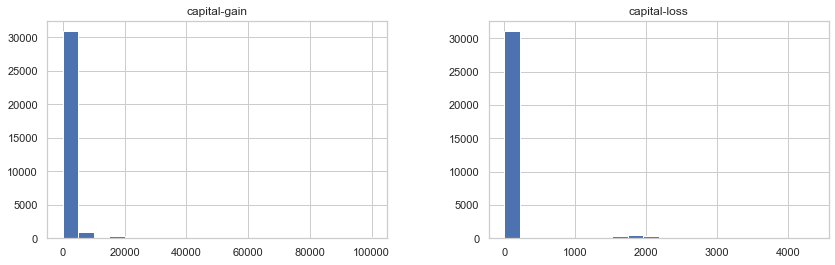

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(14,4))

census.hist('capital-gain', bins=20, ax=axes[0])
census.hist('capital-loss', bins=20, ax=axes[1])

Nos gráficos de "Capital Gain" e "Capital Loss" é possível notar que o eixo x é estendido muito além de onde as barras são plotadas. Isso acontece porque existem valores bem pequenos distribuidos no gráfico, que acabam não sendo destacados devido a escala do gráfico.<br> O que podemos fazer para melhorar essa visualização é transformá-la para escala logarítma

In [34]:
skewed = ['capital-gain', 'capital-loss']
census[skewed] = census[skewed].apply(lambda x: np.log(x + 1))
census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40,United-States,<=50K


Após aplicar a escala logarítma

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000028CF09BEE80>],
      dtype=object)

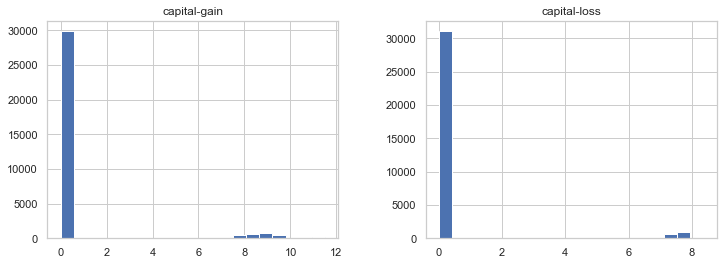

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

census.hist('capital-gain', bins=20, ax=axes[0])
census.hist('capital-loss', bins=20, ax=axes[1])

***
Iremos remove a coluna fnlwg, pois não terá importância para nós.

In [36]:
# fnlwgt: final weight. In other words, this is the number of people the census believes the entry represents
census.drop(['fnlwgt'], axis=1, inplace=True)
census.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13,United-States,<=50K
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40,United-States,<=50K
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40,United-States,<=50K
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40,Cuba,<=50K
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40,United-States,<=50K


Aqui estaremos criando a função "get_uniques", que retorna um dataframe composto pelos valores únicos de cada coluna categórica.

In [94]:
def get_uniques(df):
    aux = []
    c_name = []
    for col in df.columns:
        if df[col].nunique() < 20:
            aux.append(df[col].unique())
            c_name.append(col)
    df_n = pd.DataFrame(pd.DataFrame(aux).T)
    df_n = pd.DataFrame(df_n.values, columns = c_name)
    return df_n

In [95]:
censu_uniq_vals = get_uniques(census)
censu_uniq_vals

,workclass,education,education-num,marital-status,occupation,relationship,race,sex,Income
0,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,<=50K
1,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Black,Female,>50K
2,State-gov,11th,7,Married-spouse-absent,Prof-specialty,Wife,Asian-Pac-Islander,None,None
3,Federal-gov,Masters,14,Never-married,Other-service,Own-child,Amer-Indian-Eskimo,None,None
4,Local-gov,9th,5,Separated,Adm-clerical,Unmarried,Other,None,None
5,?,Some-college,10,Married-AF-spouse,Sales,Other-relative,None,None,None
6,Self-emp-inc,Assoc-acdm,12,Widowed,Craft-repair,None,None,None,None
7,Without-pay,Assoc-voc,11,None,Transport-moving,None,None,None,None
8,Never-worked,7th-8th,4,None,Farming-fishing,None,None,None,None
9,None,Doctorate,16,None,Machine-op-inspct,None,None,None,None


In [97]:
census['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

 <i>  Analisando os resultados, observamos que algumas células de dados categóricos estão preenchidas com o caracter " ?".<br> Então agora iremos remover essas linhas

In [100]:
census[census['native-country'] == " ?"]
census = census[census['occupation'] != " ?"]
census = census[census['native-country'] != " ?"]

Checando valores nulos.

In [101]:
census[census.isnull().any(axis=1)]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income


### Preparando dados para modelos Machine Learnig

Primeiramente iremos normalizar o dados numéricos entre 0 - 1

In [138]:
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Make a copy of the our original df
census_minmax_transform = pd.DataFrame(data = census)

# Scale our numerica data
census_minmax_transform[numerical] = scaler.fit_transform(census_minmax_transform[numerical])

census_minmax_transform.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,0.122449,United-States,<=50K
1,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,0.397959,United-States,<=50K
2,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,0.397959,United-States,<=50K
3,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,0.397959,Cuba,<=50K
4,0.273973,Private,Masters,0.866667,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,0.397959,United-States,<=50K


Removendo a coluna de label do dataframe.

In [139]:
income_raw = census_minmax_transform['Income']
census_minmax_transform = census_minmax_transform.drop('Income', axis = 1)

Aqui iremos fazer o processo de One-hot encode, para transformar os dados categóricos em numéricos.

In [143]:
# One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(census_minmax_transform)

# Encode the 'income_raw' data to numerical values
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
income = income_raw.apply(lambda x: 0 if x == "<=50K" else 1)
income = pd.Series(encoder.fit_transform(income_raw))

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} features depois do one-hot encoding.".format(len(encoded)))

print("\n",encoded)

103 features depois do one-hot encoding.

 ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-manageri

Aqui separamos entre dados de treino e de teste

In [145]:
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, income, test_size = 0.2, random_state = 0)

# Show the results of the split
print("Set de treinamento tem {} amostras.".format(X_train.shape[0]))
print("Set de teste tem {} amostras.".format(X_test.shape[0]))

Set de treinamento tem 24128 amostras.
Set de teste tem 6033 amostras.


Calculando a Acurácia mínima que deveriamos atingir, baseando nos valores de indivíduos que recebem mais que 50K em relação à toda população

In [146]:
# Calculate accuracy
accuracy = n_greater_50k / n_records

# Calculating precision
precision = n_greater_50k / (n_greater_50k + n_at_most_50k)

#Calculating recall
recall = n_greater_50k / (n_greater_50k + 0)

# Calculate F-score using the formula above for beta = 0.5
fscore =  (1  + (0.5*0.5)) * ( precision * recall / (( 0.5*0.5 * (precision))+ recall))

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.2408, F-score: 0.2839]


Na célula abaixo é criada uma função para fazer o processo de treinamento e teste, assim podemos testar vários modelos sem que seja preciso repetir vários blocos de código.

In [148]:
from sklearn.metrics import fbeta_score, accuracy_score
from time import time

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # Fit the learner to the training data using slicing with 'sample_size'
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size],y_train[:sample_size])
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end - start
        
    #  Get the predictions on the test set,
    #  then get predictions on the first 300 training samples
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end - start
            
    # Compute accuracy on the first 300 training samples
    results['acc_train'] = accuracy_score(y_train[:300],predictions_train)
        
    # Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    # Compute F-score on the the first 300 training samples
    results['f_train'] = fbeta_score(y_train[:300],predictions_train,0.5)
        
    # Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test,predictions_test,0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

Aqui nos iremos fazer os testes com números de amostras variadas, para assim analisar quanto tempo cada modelo gasta para realizar o processo de treinamento.

In [149]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

# Initialize the three models, the random states are set to 101 so we know how to reproduce the model later
clf_A = DecisionTreeClassifier(random_state=101)
clf_B = SVC(random_state = 101)
clf_C = AdaBoostClassifier(random_state = 101)

# Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = int(round(len(X_train) / 100))
samples_10 = int(round(len(X_train) / 10))
samples_100 = len(X_train)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:                                           
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

DecisionTreeClassifier trained on 241 samples.
DecisionTreeClassifier trained on 2413 samples.
DecisionTreeClassifier trained on 24128 samples.


C:\Users\Safira\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

C:\Users\Safira\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no predicted samples.



SVC trained on 241 samples.


C:\Users\Safira\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



SVC trained on 2413 samples.


C:\Users\Safira\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



SVC trained on 24128 samples.
AdaBoostClassifier trained on 241 samples.
AdaBoostClassifier trained on 2413 samples.
AdaBoostClassifier trained on 24128 samples.


In [150]:
#Printing out the values
for i in results.items():
    print(i[0])
    display(pd.DataFrame(i[1]).rename(columns={0:'1%', 1:'10%', 2:'100%'}))

DecisionTreeClassifier


,1%,10%,100%
acc_test,0.738770,0.801591,0.813526
acc_train,0.960000,1.000000,0.966667
f_test,0.466009,0.584867,0.608733
f_train,0.898438,1.000000,0.960366
pred_time,0.012006,0.015009,0.023998
train_time,0.064452,0.029994,0.532994


SVC


,1%,10%,100%
acc_test,0.761479,0.829272,0.844356
acc_train,0.760000,0.840000,0.820000
f_test,0.000000,0.653015,0.686567
f_train,0.000000,0.691964,0.625000
pred_time,0.173000,1.103996,11.989005
train_time,0.018001,0.574993,67.682956


AdaBoostClassifier


,1%,10%,100%
acc_test,0.799271,0.858777,0.856456
acc_train,0.876667,0.826667,0.826667
f_test,0.577615,0.717907,0.714166
f_train,0.744382,0.642857,0.641892
pred_time,0.312006,0.284978,0.365999
train_time,0.143992,0.376024,3.381004


Plotando a matriz de confusão dos modelos.

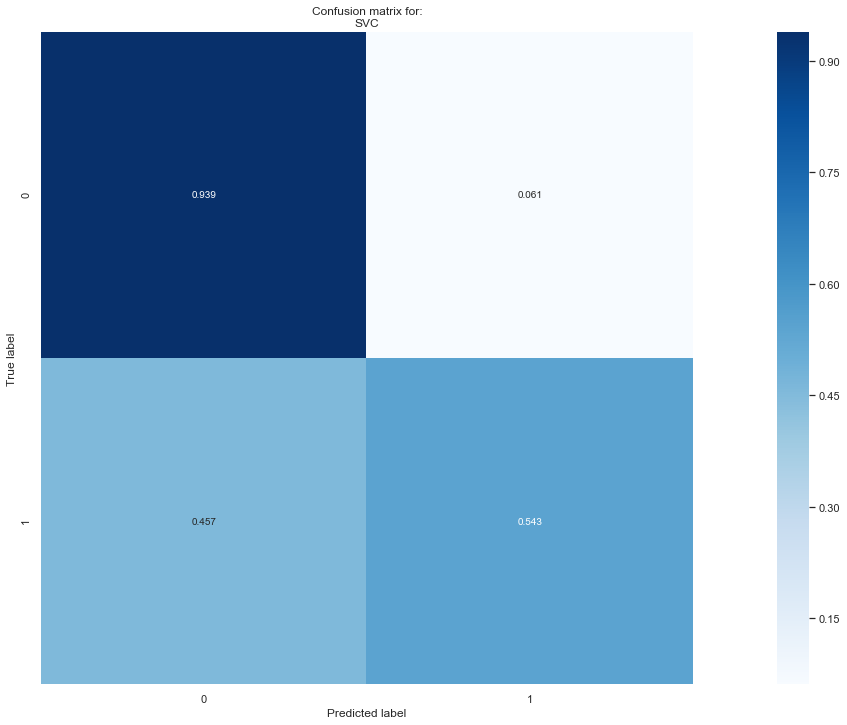

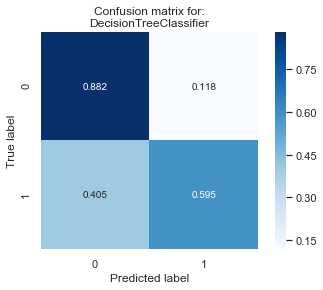

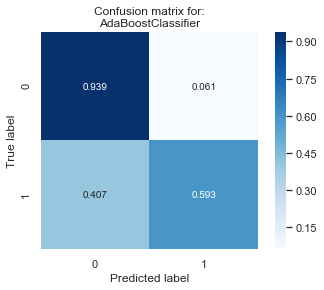

In [151]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(30,12))

for i,model in enumerate([clf_A,clf_B,clf_C]):
    cm = confusion_matrix(y_test, model.predict(X_test))
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize the data

    # view with a heatmap
    plt.figure(i)
    sns.heatmap(cm, annot=True, annot_kws={"size":10}, 
            cmap='Blues', square=True, fmt='.3f')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion matrix for:\n{}'.format(model.__class__.__name__));

Abaixo iremos usar o módulo GridSearchCV para descobrir(sintonizar) os melhores parâmetros para nosso modelo.
 

In [152]:
# Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# Initialize the classifier
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

# Create the parameters list you wish to tune
parameters = {'n_estimators':[50, 120], 
              'learning_rate':[0.1, 0.5, 1.],
              'base_estimator__min_samples_split' : np.arange(2, 8, 2),
              'base_estimator__max_depth' : np.arange(1, 4, 1)
             }

# Make an fbeta_score scoring object
scorer = make_scorer(fbeta_score,beta=0.5)

# Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(clf, parameters,scorer)

# Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train,y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print(best_clf)

C:\Users\Safira\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



Unoptimized model
------
Accuracy score on testing data: 0.8241
F-score on testing data: 0.6317

Optimized Model
------
Final accuracy score on the testing data: 0.8694
Final F-score on the testing data: 0.7438
AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=6,
                                                     